## **The Sparks Foundation - Graduate Rotational Internship Program**
### **Data Science and Business Analytics Task-1**
##### A simple linear regression task to predict the percentage of an student based on the number of study hours per day



In [1]:
# Import all the required Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully\n")

# size is number of observations
size=data.size
print("Data have total",size,"observations\n")

print("First 10 observations are shown below")
data.head(10)

Data imported successfully

Data have total 50 observations

First 10 observations are shown below


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now we will plot our dataset on a graph.


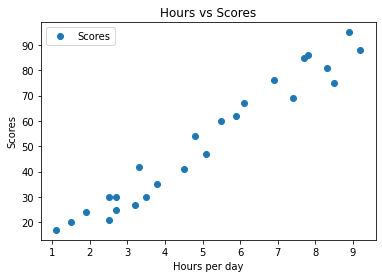

In [3]:
# we are using matplotlib here
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Scores")
plt.xlabel("Hours per day")
plt.ylabel("Scores")
plt.show()

**There is a positive correlation between two variables which means that if a student studies for more hours per day, then he/she will probably score more.**

### **Preparing the data**

#### In this part we have to remove ambiguities from the data and remove all the missing observations.

In [4]:
# Let's look at the summarized description of our data
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Check if there are any Null values in the data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no missing value and all the values are in Interger Datatype only.
We can proceed to divide the data in dependent (input) and independent (output) variables.

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Let's split the data into Training and Testing sets with test size to be 30% of whole datset.

In [7]:
# In this we will use sklearn 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
print("Number of Observations in Training set is",X_train.size)
print("Number of Observations in Testing set is",X_test.size)


Number of Observations in Training set is 17
Number of Observations in Testing set is 8


### **Train the model**
We will train the model using our Training datset 

In [8]:
# We will again use sklearn
from sklearn.linear_model import LinearRegression
# lr is our regression model  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# The obtained regression line is
print("Regression line is \nScores=",lr.coef_[0]," * Hours/day + ",lr.intercept_,)

Regression line is 
Scores= 9.788566686749045  * Hours/day +  2.3708153823418883


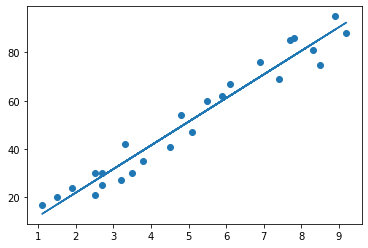

In [10]:
# Let's plot this regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the whole data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### **Testing the model**


In [11]:
y_pred=lr.predict(X_test)
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
df 

,Actual Scores,Predicted Scores
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### **Evaluating the model**
We have trained and tested our data. Now it's time to evaluate the model.
There are various measures to do that like Mean Absolute Error or Coefficient of Determination.


In [12]:
from sklearn import metrics 
print('Mean Absolute Error is:', metrics.mean_absolute_error(y_test, y_pred)) 
print("R^2 is:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error is: 4.419727808027651
R^2 is: 0.9568211104435257


Mean absolutte error (MAE) shows the absolute error between the actual values and predicted values.


R-squared value is the coefficient of determination. R-sqaured value close to 1 shows that the model has a good fit on the given test values.


### **Prediction**

In [13]:
hours=9.25
pred=lr.predict([[hours]])
print("Prescited score for",hours,"Hours per day is",pred[0])

Prescited score for 9.25 Hours per day is 92.91505723477056


### **Task completed**